LinearRegression
Mean Squared Error: 0.01615783211614635
R-squared: 0.5463403671308642


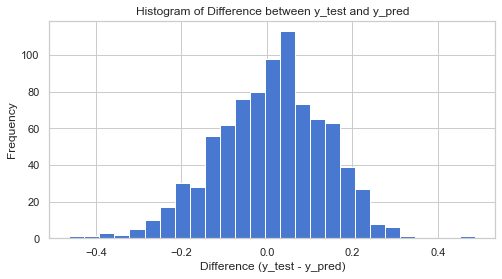

______________
GradientBoostingRegressor
Mean Squared Error: 0.015369116275897331
R-squared: 0.5684849553375884


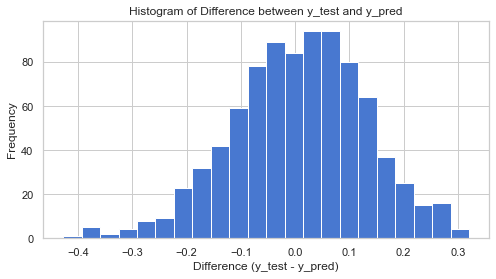

______________
RandomForestRegressor
Mean Squared Error: 0.16013731926408656
R-squared: -3.496137659048758


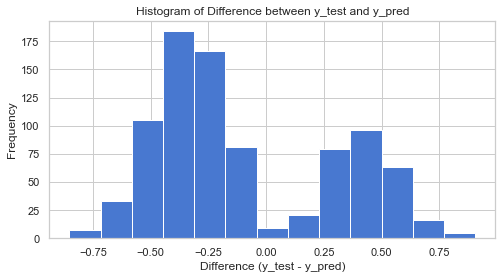

______________
SVR
Mean Squared Error: 0.01598829840115767
R-squared: 0.5511003251715132


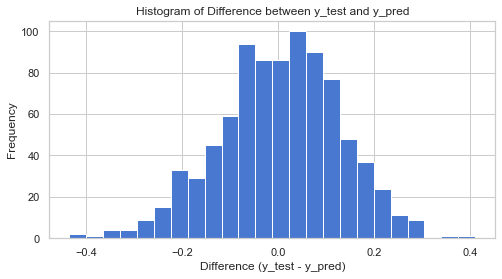

In [2]:
# Предсказательные модели "metascore_rate"

import pandas as pd 
import numpy as np
import scipy.stats as sts
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import defaultdict

# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8, 4)

df = pd.read_csv('result_films.csv')
df = df.drop('description', axis=1)

from sklearn.metrics import mean_squared_error, r2_score




#__________________________________________________



# Создаем список уникальных жанров
genres = set()
for genre_list in df['genre']:
    genres.update(genre_list.split(', '))

# Создаем новые столбцы для каждого жанра и заполняем их нулями
for genre in genres:
    df[genre] = 0

# Обновляем значения столбцов жанров
for index, row in df.iterrows():
    genre_list = row['genre'].split(', ')
    for genre in genre_list:
        df.at[index, genre] = 1
df.head()

# Извлекаем год выпуска фильма и сохраняем его в отдельный столбец "release_year"
df['release_year'] = df['release_year'].str.extract(r'(\d{4})')

# Удаляем скобки и "(I)" из столбца "release_year"
df['release_year'] = df['release_year'].str.replace(r'\(I\)', '')

# Преобразуем столбец "release_year" в числовой формат
df['release_year'] = df['release_year'].astype(int)

# Удаление столбца "genre"
df_1 = df.drop({"name", "genre", "global_rate"}, axis=1)

# Удаление слова "min" и преобразование значения в числовой тип данных
df_1["duration"] = df_1["duration"].str.replace(" min", "")

# Замена пропущенных значений на нули
df_1["duration"].fillna(0, inplace=True)
df_1["duration"] = df_1["duration"].astype(int)

# Нормализация значений в столбцах
df_1["release_year"] = pd.to_numeric(df["release_year"], errors='coerce').astype(float)
df_1["imdb_rate"] = df_1["imdb_rate"].str.replace(',', '.').astype(float)
df_1["metascore_rate"] = pd.to_numeric(df["metascore_rate"], errors='coerce').astype(float)
df_1["votes"] = pd.to_numeric(df["votes"], errors='coerce').astype(float)

cols_to_normalize = ["release_year", "imdb_rate", "metascore_rate", "votes", "duration"]
df_1[cols_to_normalize] = df_1[cols_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

df_train, df_test = train_test_split(df_1, test_size=0.2,  random_state=38)

# Выделение признаков и целевой переменной в обучающей выборке
X_train = df_train.drop("metascore_rate", axis=1)
y_train = df_train["metascore_rate"]

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Выделение признаков в тестовой выборке
X_test = df_test.drop("metascore_rate", axis=1)
y_test = df_test["metascore_rate"]
# Выполнение предсказания для тестовой выборки
y_pred = model.predict(X_test)

# Вычисление метрик оценки модели
mse = mean_squared_error(df_test["metascore_rate"], y_pred)
r2 = r2_score(df_test["metascore_rate"], y_pred)
print('LinearRegression')

# Вывод значений метрик
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Построение гистограммы разницы
diff = y_test - y_pred
plt.hist(diff, bins='auto')
plt.xlabel('Difference (y_test - y_pred)')
plt.ylabel('Frequency')
plt.title('Histogram of Difference between y_test and y_pred')
plt.show()

print('______________')
print('GradientBoostingRegressor')
# Разделение данных на признаки и целевую переменную
X_train = df_train.drop("metascore_rate", axis=1)
y_train = df_train["metascore_rate"]

X_test = df_test.drop("metascore_rate", axis=1)
y_test = df_test["metascore_rate"]

# Создание и обучение модели градиентного бустинга
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

mse = mean_squared_error(df_test["metascore_rate"], y_pred)
r2 = r2_score(df_test["metascore_rate"], y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

diff = y_test - y_pred
plt.hist(diff, bins='auto')
plt.xlabel('Difference (y_test - y_pred)')
plt.ylabel('Frequency')
plt.title('Histogram of Difference between y_test and y_pred')
plt.show()


print('______________')
print('RandomForestRegressor')
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

# Разделение данных на признаки и целевую переменную
X_train = df_train.drop("metascore_rate", axis=1)
y_train = df_train["metascore_rate"]

X_test = df_test.drop("metascore_rate", axis=1)
y_test = df_test["metascore_rate"]

# Создание и обучение модели случайного леса
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Округление предсказанных значений до целых чисел
y_pred = y_pred.round()

mse = mean_squared_error(df_test["metascore_rate"], y_pred)
r2 = r2_score(df_test["metascore_rate"], y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

diff = y_test - y_pred
plt.hist(diff, bins='auto')
plt.xlabel('Difference (y_test - y_pred)')
plt.ylabel('Frequency')
plt.title('Histogram of Difference between y_test and y_pred')
plt.show()


print('______________')
print('SVR')
# Разделение данных на признаки и целевую переменную
X_train = df_train.drop("metascore_rate", axis=1)
y_train = df_train["metascore_rate"]

X_test = df_test.drop("metascore_rate", axis=1)
y_test = df_test["metascore_rate"]

# Создание и обучение модели метода опорных векторов
model = SVR()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print("Mean Squared Error:", mse)
print("R-squared:", r2)

diff = y_test - y_pred
plt.hist(diff, bins='auto')
plt.xlabel('Difference (y_test - y_pred)')
plt.ylabel('Frequency')
plt.title('Histogram of Difference between y_test and y_pred')
plt.show()

